Kacper Dobek 148247

## Conditional entropy of natural languages

In [8]:
import matplotlib.pyplot as plt
import numpy as np
RANK = 7

In [9]:
class EntropyText:
    def __init__(self, filename, rank):
        self.filename = filename
        self.text = self.loadFile(filename)
        self.rank = rank
        self.word_cond_entropies = []
        self.char_cond_entropies = []
    def loadFile(self,filename):
        with open(filename) as f:
            text = f.readlines()
        return str(text)
    def calculateEntropy(self, data, rank):
        subsets =[]
        for i in range(len(data)-rank+1):
            subsets.append(data[i:i+rank])
        value, counts = np.unique(subsets, return_counts=True, axis=0)
        norm_counts = counts / counts.sum()
        entropy = -(norm_counts * np.log(norm_counts)/np.log(2)).sum()
        return entropy
    def calculateWordCounts(self):
        data = self.text.split(' ')
        temp = [0]
        for i in range(1, self.rank+1):
            result = self.calculateEntropy(data, i)
            temp.append(result)
            self.word_cond_entropies.append(temp[i] - temp[i-1])
    def calculateCharCounts(self):
        data = list(self.text)
        temp = [0]
        for i in range(1, self.rank+1):
            result = self.calculateEntropy(data, i)
            temp.append(result)
            self.char_cond_entropies.append(temp[i] - temp[i-1])
    def run(self):
        self.calculateWordCounts()
        self.calculateCharCounts()
        print('Words', self.word_cond_entropies)
        print('Characters', self.char_cond_entropies)
        self.plot()
    def plot(self):
        plt.figure(figsize = (20,8))
        plt.subplot(1, 2, 1)
        plt.xticks(range(0,self.rank))
        plt.xlabel('Rank', fontsize=20)
        plt.ylabel('Entropy', fontsize=20)
        plt.plot(self.word_cond_entropies)
        plt.title('Words for ' + self.filename, fontsize=30, fontweight='bold')
        plt.subplot(1, 2, 2)
        plt.xticks(range(0, self.rank))
        plt.plot(self.char_cond_entropies)
        plt.title('Characters for ' + self.filename, fontsize = 30, fontweight = 'bold')
        plt.xlabel('Rank', fontsize=20)
        plt.ylabel('Entropy', fontsize=20)
        plt.show()


Remark: The first value in the list is the conditional entropy of rank 0 and then for the following ranks.

# English

Words [11.544005687348674, 6.389165781801138, 2.1764556359854446, 0.4846771523116047, 0.1096521264019934, 0.030770226403923573, 0.011964330407927548]
Characters [4.288228906794748, 3.516603834173143, 3.0183178487593914, 2.481564638610301, 2.021183744088143, 1.6724075160036875, 1.3876949401867158]


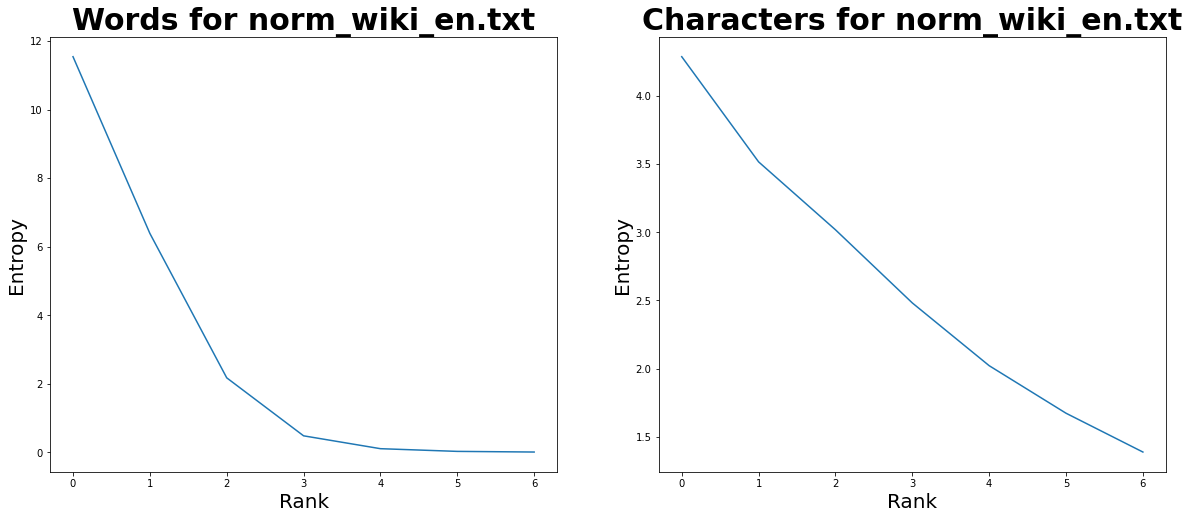

Wall time: 4min 29s


In [10]:
en = EntropyText("norm_wiki_en.txt", RANK)
%time en.run()


# Latin

Words [11.969203869802366, 4.400024289750823, 1.1668869636879506, 0.38803872789331706, 0.20647256391194446, 0.16511195036339288, 0.14959416741379883]
Characters [4.228252830930357, 3.450125380933703, 2.8234912515617827, 2.152030910038702, 1.6427636199338966, 1.3127474968305144, 1.0690516347939916]


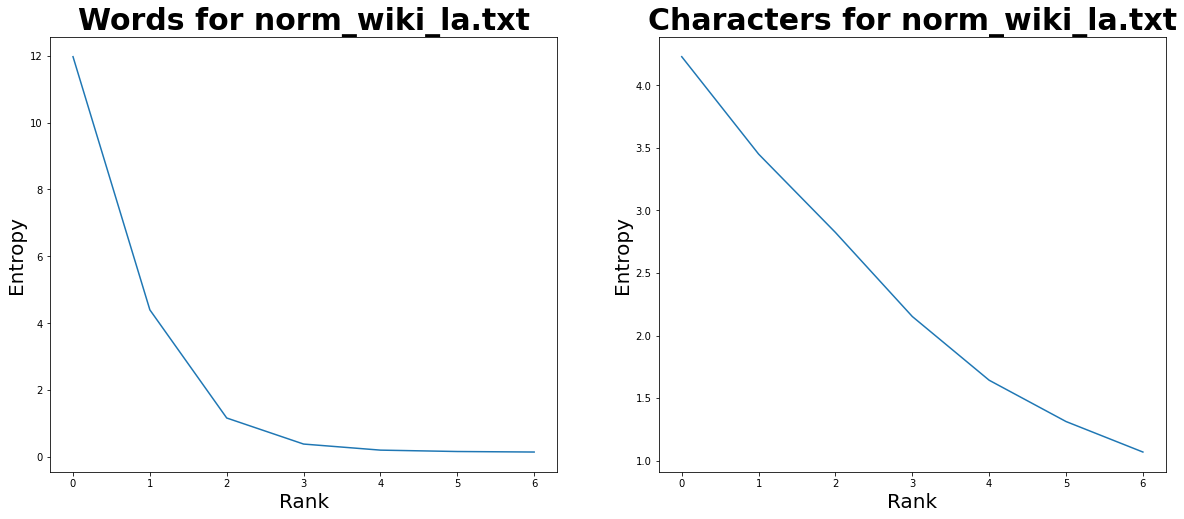

Wall time: 6min 36s


In [11]:
la = EntropyText("norm_wiki_la.txt", RANK)
%time la.run()


Words [9.154138583337705, 3.863879380133934, 1.7187833506421661, 0.8992415285199993, 0.5385561889529829, 0.3138386101225734, 0.18827401379508402]
Characters [3.875006707138219, 2.9472583234186125, 2.3675695232368916, 1.7952566925905806, 1.3415923624115287, 1.0198418003089316, 0.8019886582827347]


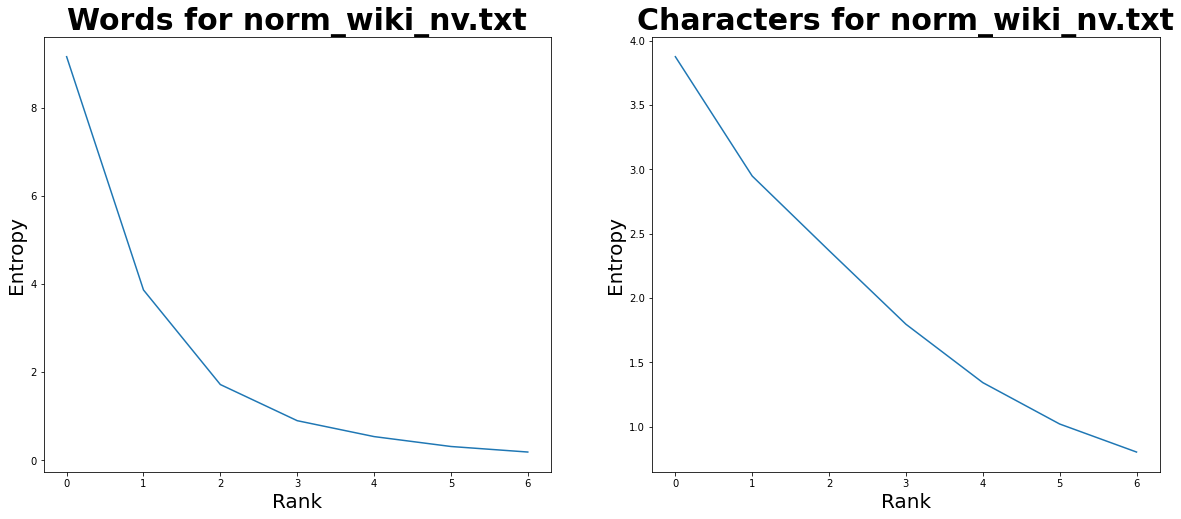

Wall time: 21.5 s


In [12]:
nv = EntropyText("norm_wiki_nv.txt", RANK)
%time nv.run()

Words [7.748765080484883, 7.486378768104288, 4.406691907056466, 0.5950070611839422, 0.0120609601832804, 9.995634531989595e-05, 2.052220207104938e-06]
Characters [4.273012620579925, 2.9158926391638778, 2.0003582749629016, 1.5392810512210708, 1.4385810728143547, 1.3919679765466118, 1.3028451435848822]


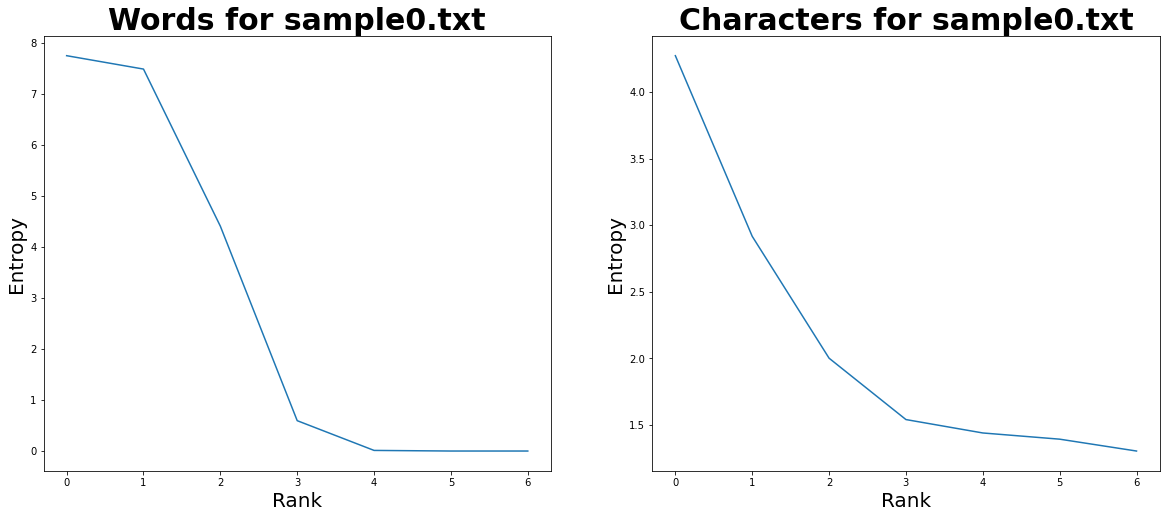

Wall time: 2min 38s


In [13]:
s0 = EntropyText("sample0.txt", RANK)
%time s0.run()


Words [11.500717876205776, 5.372225103360179, 1.574731782922445, 0.5075074061349873, 0.2934550940673475, 0.15056287278920166, 0.11672742148439852]
Characters [4.127017171813421, 3.239148635327406, 2.861278018129492, 2.326683451391066, 1.8135089710098047, 1.4311237266681491, 1.142001406632863]


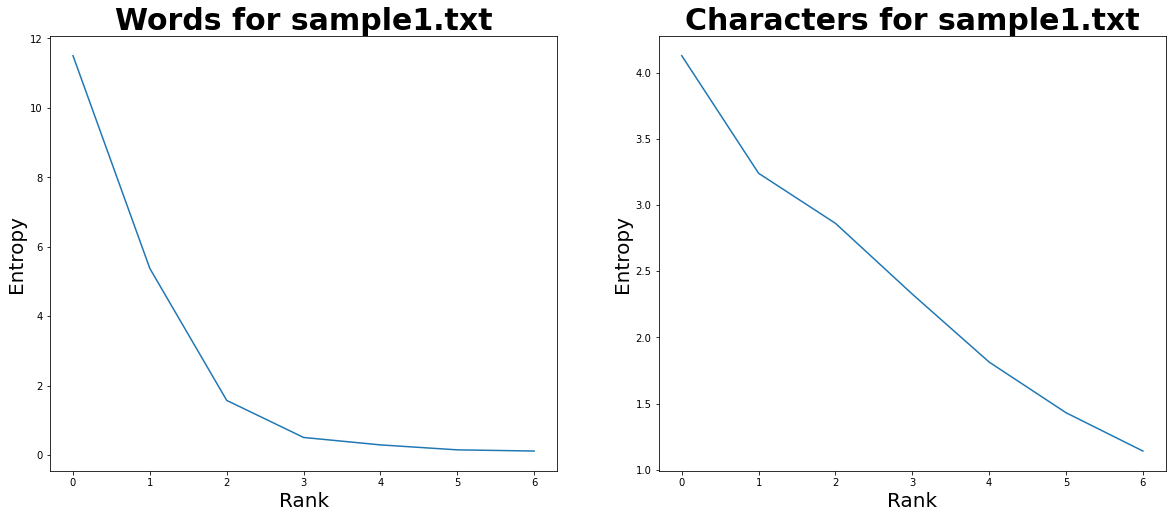

Wall time: 3min 9s


In [14]:
s1 = EntropyText("sample1.txt", RANK)
%time s1.run()

Words [8.023889709766813, 7.3486076304032455, 3.7819273914986997, 0.8595038374128592, 0.08198987545923941, 0.002985722675379776, 7.885463561407846e-05]
Characters [3.993325841432541, 3.050437382480033, 2.4676585306373777, 1.9397707259246122, 1.7020310713375153, 1.6144120267343656, 1.5398769414593243]


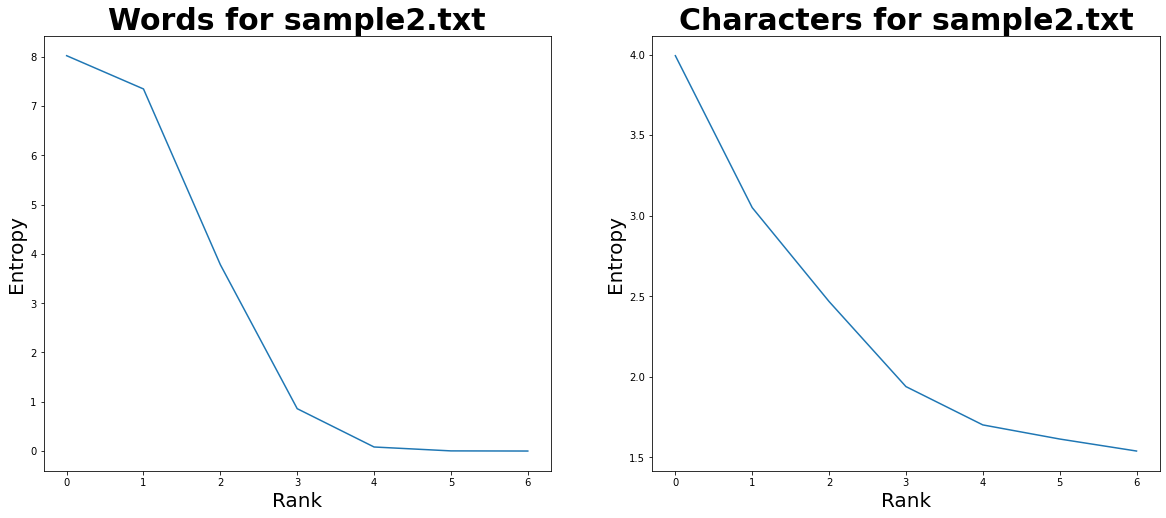

Wall time: 2min 25s


In [15]:
s2 = EntropyText("sample2.txt", RANK)
%time s2.run()


Words [9.06114105826548, 5.95020278397196, 2.6307971492341657, 1.2640858119193794, 0.4143243558451353, 0.2001209703278093, 0.112782478165105]
Characters [3.930309329314838, 3.184465699992204, 2.627893539212458, 2.0239896850803785, 1.5342413163350574, 1.2504118054120372, 1.0840520444371577]


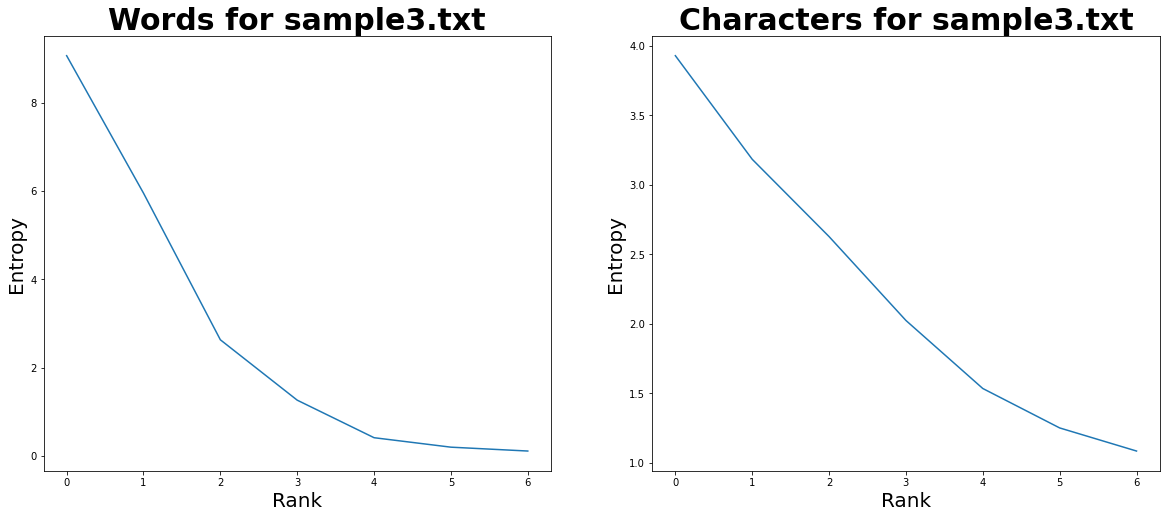

Wall time: 4min 48s


In [16]:
s3 = EntropyText("sample3.txt", RANK)
%time s3.run()


Words [17.12967780184582, 3.4442503272216243, 0.23407510396859266, 0.003226641760324611, 6.824796329851779e-06, -7.840940234871141e-07, -7.84094478234465e-07]
Characters [4.253815024339987, 4.229100482987418, 4.226827949890392, 4.17853418770197, 3.7661306706704742, 2.390570611412251, 0.7084142222842829]


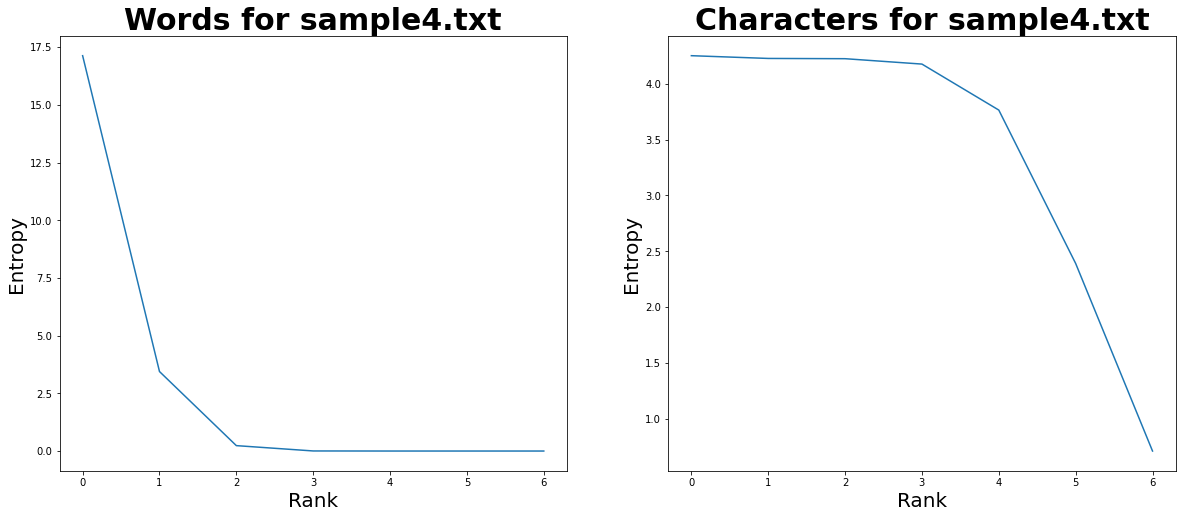

Wall time: 6min 50s


In [17]:
s4 = EntropyText("sample4.txt", RANK)
%time s4.run()


Words [16.509550301431602, -3.084658573015986e-08, -3.084596755797975e-08, -3.084537425479539e-08, -3.08447525299016e-08, -3.084415922671724e-08, -3.0843544607250806e-08]
Characters [4.441693934198234, 3.523097364782892, 3.2506198708023213, 2.8342705153506476, 2.172440190230846, 1.4468675792092718, 0.8847410545230936]


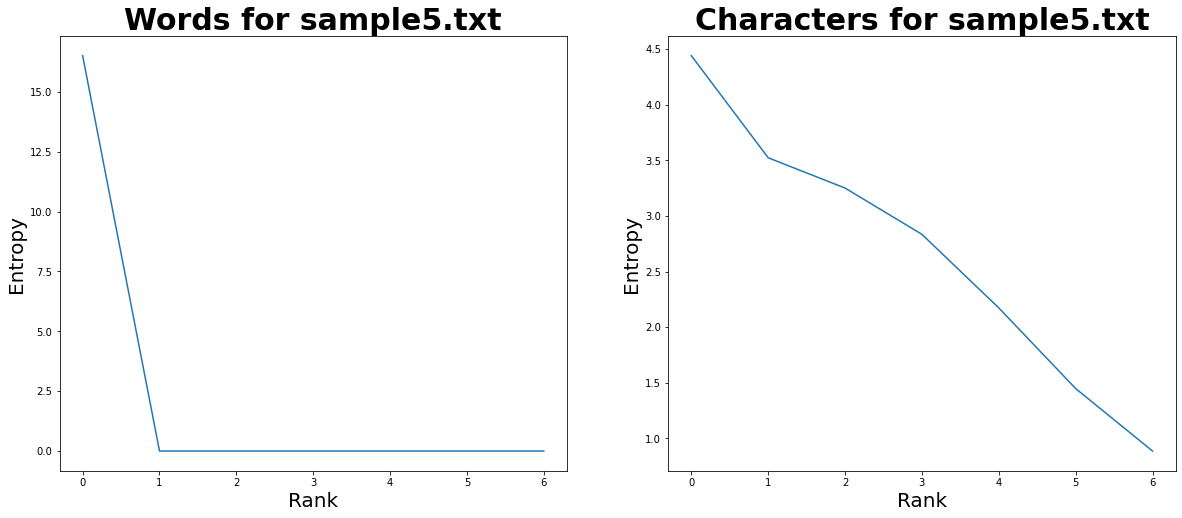

Wall time: 5min 54s


In [18]:
s5 = EntropyText("sample5.txt", RANK)
%time s5.run()

Answers:

Texts containing natural languages: 1,3
 
Texts not containing natural languages: 0,2,4,5